Installing Liabraries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
# from sklearn.utils import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Importing Data from CSV 

In [3]:
data = pd.read_csv("abalone.csv")

data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Data Visualization

<AxesSubplot:>

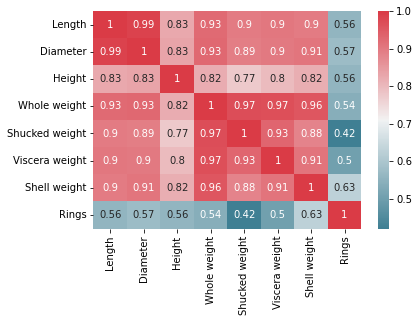

In [8]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [9]:
data_trunc = pd.DataFrame({ "Whole_Weight": data["Whole weight"],
                           "Char_Len": np.cbrt(data["Length"]*data["Diameter"]*data["Height"]),
                           "Rings": data["Rings"],
                           "Sex": data["Sex"]})

In [10]:
data_trunc.corr()

,Whole_Weight,Char_Len,Rings
Whole_Weight,1.000000,0.930136,0.540390
Char_Len,0.930136,1.000000,0.592405
Rings,0.540390,0.592405,1.000000


In [11]:
data_trunc["Log_Rings"] = np.log(data_trunc["Rings"])

In [12]:
data_trunc.corr()

,Whole_Weight,Char_Len,Rings,Log_Rings
Whole_Weight,1.000000,0.930136,0.540390,0.595942
Char_Len,0.930136,1.000000,0.592405,0.681548
Rings,0.540390,0.592405,1.000000,0.965772
Log_Rings,0.595942,0.681548,0.965772,1.000000


In [13]:
data_trunc["Is_Infant"] = data_trunc["Sex"].map(lambda x: 0 if x=="M" or x=="F"  else 1  )

In [14]:
data_trunc

,Whole_Weight,Char_Len,Rings,Sex,Log_Rings,Is_Infant
0,0.5140,0.250809,15,M,2.708050,0
1,0.2255,0.202855,7,M,1.945910,0
2,0.6770,0.310899,9,F,2.197225,0
3,0.5160,0.271781,10,M,2.302585,0
4,0.2050,0.188820,7,I,1.945910,1
...,...,...,...,...,...,...
4172,0.8870,0.347468,11,F,2.397895,0
4173,0.9660,0.327250,10,M,2.302585,0
4174,1.1760,0.388031,9,M,2.197225,0
4175,1.0945,0.356920,10,F,2.302585,0


In [15]:
data_trunc["x"] = np.cbrt(data_trunc["Whole_Weight"])

In [16]:
data_trunc["Log_Rings"] = np.log(data_trunc["Rings"])

In [17]:
data_trunc

,Whole_Weight,Char_Len,Rings,Sex,Log_Rings,Is_Infant,x
0,0.5140,0.250809,15,M,2.708050,0,0.801040
1,0.2255,0.202855,7,M,1.945910,0,0.608670
2,0.6770,0.310899,9,F,2.197225,0,0.878071
3,0.5160,0.271781,10,M,2.302585,0,0.802078
4,0.2050,0.188820,7,I,1.945910,1,0.589637
...,...,...,...,...,...,...,...
4172,0.8870,0.347468,11,F,2.397895,0,0.960818
4173,0.9660,0.327250,10,M,2.302585,0,0.988536
4174,1.1760,0.388031,9,M,2.197225,0,1.055526
4175,1.0945,0.356920,10,F,2.302585,0,1.030557


In [18]:
data_trunc.corr()

,Whole_Weight,Char_Len,Rings,Log_Rings,Is_Infant,x
Whole_Weight,1.000000,0.930136,0.540390,0.595942,-0.557592,0.957347
Char_Len,0.930136,1.000000,0.592405,0.681548,-0.570423,0.977408
Rings,0.540390,0.592405,1.000000,0.965772,-0.436063,0.584473
Log_Rings,0.595942,0.681548,0.965772,1.000000,-0.489157,0.673476
Is_Infant,-0.557592,-0.570423,-0.436063,-0.489157,1.000000,-0.584644
x,0.957347,0.977408,0.584473,0.673476,-0.584644,1.000000


In [20]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [21]:
df=data

In [22]:
def label_race (row):
   if row['Rings']>=1 and row['Rings']<=8:
      return 1
   elif row['Rings'] >=9 and row['Rings']<=10:
      return 2
   elif row['Rings']>=11 and row['Rings']<=29:
      return 3
   return 0

In [23]:
df['Age'] = df.apply(lambda _: '', axis=1)

In [24]:
df['Age']=df.apply (lambda row: label_race (row),axis=1)

In [27]:
sex_dictionary = {'M': 1, 'F' : 2,'I':3}
df['Sex'] = df['Sex'].apply(lambda x: sex_dictionary[x])

In [28]:
df.Sex = df.Sex.astype(float)

In [29]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [30]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
1257,3.0,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1
3996,3.0,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,1


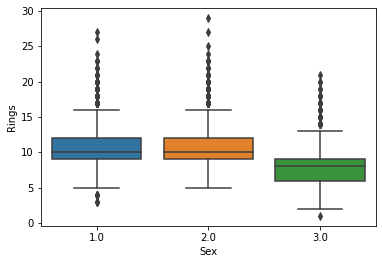

In [31]:
ax = sns.boxplot(x="Sex", y="Rings", data=df)
plt.show()

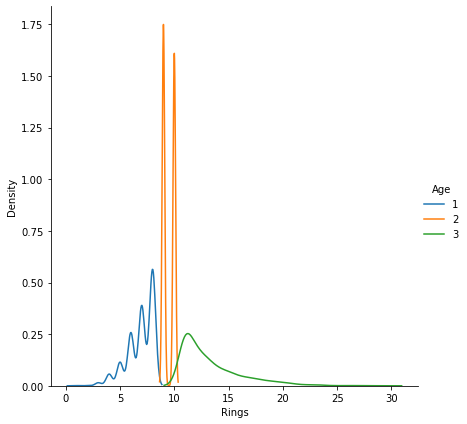

In [32]:
sns.FacetGrid(df, hue="Age", height=6) \
   .map(sns.kdeplot, "Rings") \
   .add_legend()
plt.show()

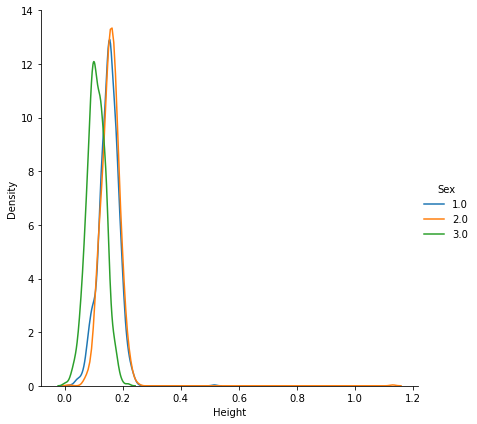

In [33]:
sns.FacetGrid(df, hue="Sex", height=6) \
   .map(sns.kdeplot, "Height") \
   .add_legend()
plt.show()

In [34]:
Y = df[['Age']]
Y 

,Age
0,3
1,1
2,2
3,2
4,1
...,...
4172,3
4173,2
4174,2
4175,2


In [35]:
X=df.drop(['Age','Rings'], axis=1)
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


<Figure size 432x288 with 0 Axes>

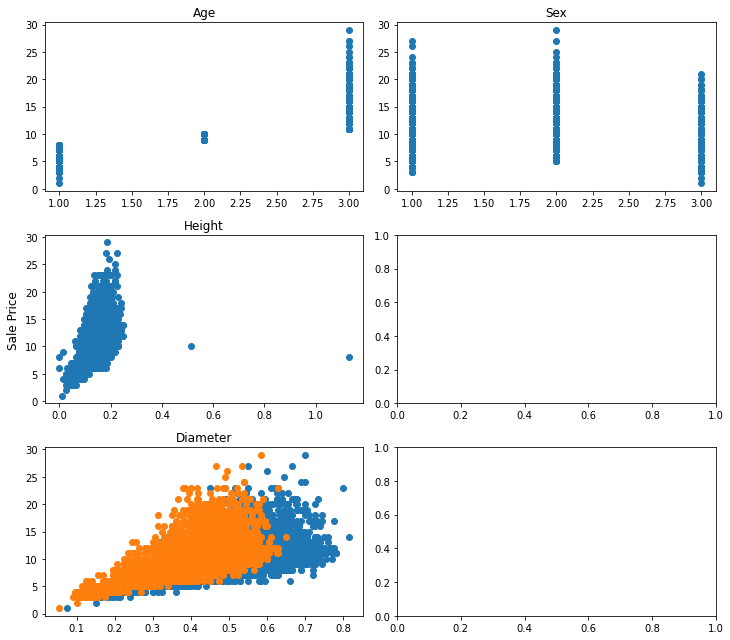

In [36]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
ring = df.Rings.values
axarr[0, 0].scatter(df.Age.values, ring)
axarr[0, 0].set_title('Age')
axarr[0, 1].scatter(df.Sex.values, ring)
axarr[0, 1].set_title('Sex')
axarr[1, 0].scatter(df.Height.values, ring)
axarr[1, 0].set_title('Height')
axarr[2, 0].scatter(df.Length.values, ring)
axarr[2, 0].set_title('Length')
axarr[2, 0].scatter(df.Diameter.values, ring)
axarr[2, 0].set_title('Diameter')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

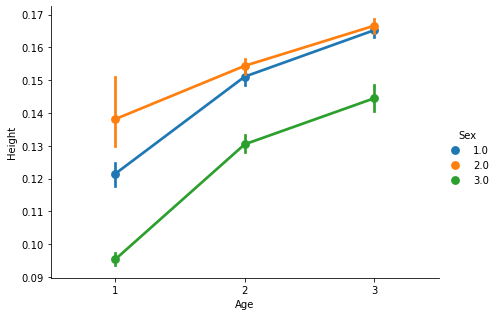

In [37]:
sns.factorplot('Age', 'Height', hue = 'Sex', estimator = np.mean, data = df, 
             height = 4.5, aspect = 1.4)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, Y) # splits 75%/25% by default

In [39]:
print("train_df_x:")
print(train_X.shape)

print("train_df_y:")
print(train_y.shape)

print("test_df_x:")
print(test_X.shape)

print("test_df_y:")
print(test_y.shape)

train_df_x:
(3132, 8)
train_df_y:
(3132, 1)
test_df_x:
(1045, 8)
test_df_y:
(1045, 1)


In [40]:
def getAccuracy(testSet, predictions):

    correct = 0

    for x in range(len(testSet)):

        if testSet[x][-1] == predictions[x]:

            correct += 1

    return (correct/float(len(testSet))) * 100.0

In [41]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

#logistic regression
log_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
log_reg.fit(train_X, train_y)
print ("Intercept is ",log_reg.intercept_)
print("Coefficient is ",log_reg.coef_)
y_pred=log_reg.predict(test_X)

Intercept is  [ 2.22889386 -1.04858603 -1.18030782]
Coefficient is  [[ 0.32589012 -1.32299908 -1.97395773 -1.22332956 -2.35159395  4.95083808
  -0.75655679 -4.89226716]
 [-0.13245969  1.93487852  1.30534425  0.21692351 -0.96778374  1.52977611
   1.13142262 -0.06356884]
 [-0.19343043 -0.61187945  0.66861348  1.00640605  3.31937769 -6.48061419
  -0.37486583  4.955836  ]]


In [42]:
#calculate Confusion Matrix
print("Confusion Matrix: ")
confusion_matrix(test_y, y_pred)

Confusion Matrix: 


array([[263,  49,  12],
       [ 72, 157, 111],
       [ 36,  87, 258]], dtype=int64)

In [43]:
print("Accuracy of Logistic Regression is:")
print(accuracy_score(test_y, y_pred)*100)

Accuracy of Logistic Regression is:
64.88038277511961


In [44]:
#Mean Absolute Error 
mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))

MAE:0.39712918660287083


In [45]:
#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))

RMSE:0.6992819283457887


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [50]:
print("Classification report for Test data %s:\n%s\n\n"
     % (log_reg, metrics.classification_report(test_y, y_pred)))

Classification report for Test data LogisticRegression(multi_class='multinomial', solver='newton-cg'):
              precision    recall  f1-score   support

           1       0.71      0.81      0.76       324
           2       0.54      0.46      0.50       340
           3       0.68      0.68      0.68       381

    accuracy                           0.65      1045
   macro avg       0.64      0.65      0.64      1045
weighted avg       0.64      0.65      0.64      1045





In [51]:
def confusion_matrix_data(conf_matrix):
    fix, ax = plt.subplots(figsize=(16, 12))
    plt.suptitle('Confusion Matrix  on Data Set')
    for ii, values in conf_matrix.items():
        matrix = values['matrix']
        title = values['title']
        plt.subplot(2, 2, ii) # starts from 1
        plt.title(title);
        sns.heatmap(matrix, annot=True,  fmt='');

In [52]:
from sklearn.metrics import confusion_matrix
#Random Forest
rf = RandomForestClassifier(n_jobs=2)
rf.fit(train_X, train_y)
preds = rf.predict_proba(test_X)[:,1]
y_pred=rf.predict(test_X)
#calculate ROC curve
#calculate_roc_curve(y_test, y_pred,2) 


#calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)

Confusion Matrix


array([[264,  47,  13],
       [ 63, 172, 105],
       [ 22,  95, 264]], dtype=int64)

In [53]:
print("Accuracy of Random Forest is:")
print(accuracy_score(test_y, y_pred)*100)

Accuracy of Random Forest is:
66.98564593301435


In [54]:
#Mean Absolute Error 
mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))

MAE:0.36363636363636365


In [55]:
#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse)) 

RMSE:0.6562179588897107


In [56]:
print("Classification report for Test data %s:\n%s\n\n"
     % (rf, metrics.classification_report(test_y, y_pred)))

Classification report for Test data RandomForestClassifier(n_jobs=2):
              precision    recall  f1-score   support

           1       0.76      0.81      0.78       324
           2       0.55      0.51      0.53       340
           3       0.69      0.69      0.69       381

    accuracy                           0.67      1045
   macro avg       0.67      0.67      0.67      1045
weighted avg       0.66      0.67      0.67      1045





In [57]:
# Create an instance of KNeighborsClassifier and then fit training data
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(train_X,train_y)
# Make class predictions for all observations in X
y_pred = clf.predict(test_X)

#calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)

Confusion Matrix


array([[260,  52,  12],
       [ 82, 173,  85],
       [ 34, 107, 240]], dtype=int64)

In [58]:
print("Accuracy of KNN Classifier is:")
print(accuracy_score(test_y, y_pred)*100)

#Mean Absolute Error 

mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))

Accuracy of KNN Classifier is:
64.40191387559808
MAE:0.4


In [59]:
#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))

RMSE:0.6985973643751898


In [60]:
print("Classification report for Test data %s:\n%s\n\n"
     % (clf, metrics.classification_report(test_y, y_pred)))

Classification report for Test data KNeighborsClassifier():
              precision    recall  f1-score   support

           1       0.69      0.80      0.74       324
           2       0.52      0.51      0.51       340
           3       0.71      0.63      0.67       381

    accuracy                           0.64      1045
   macro avg       0.64      0.65      0.64      1045
weighted avg       0.64      0.64      0.64      1045



